In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:

import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings

In [5]:
# Initialize lists to store labels and paths
label = []
path = []

# Define the directory containing the fish images
fish_dir = 'Fish_Dataset'

# Iterate through all directories and files in the fish directory
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))

# Create a Pandas DataFrame with 'path' and 'label' columns
data = pd.DataFrame(columns=['path','label'])

# Populate the DataFrame with the collected data
data['path'] = path
data['label'] = label

# Print the first 5 rows of the DataFrame
print(data.head())

                                                path            label
0  Fish_Dataset\Fish_Dataset\Black Sea Sprat\Blac...  Black Sea Sprat
1  Fish_Dataset\Fish_Dataset\Black Sea Sprat\Blac...  Black Sea Sprat
2  Fish_Dataset\Fish_Dataset\Black Sea Sprat\Blac...  Black Sea Sprat
3  Fish_Dataset\Fish_Dataset\Black Sea Sprat\Blac...  Black Sea Sprat
4  Fish_Dataset\Fish_Dataset\Black Sea Sprat\Blac...  Black Sea Sprat


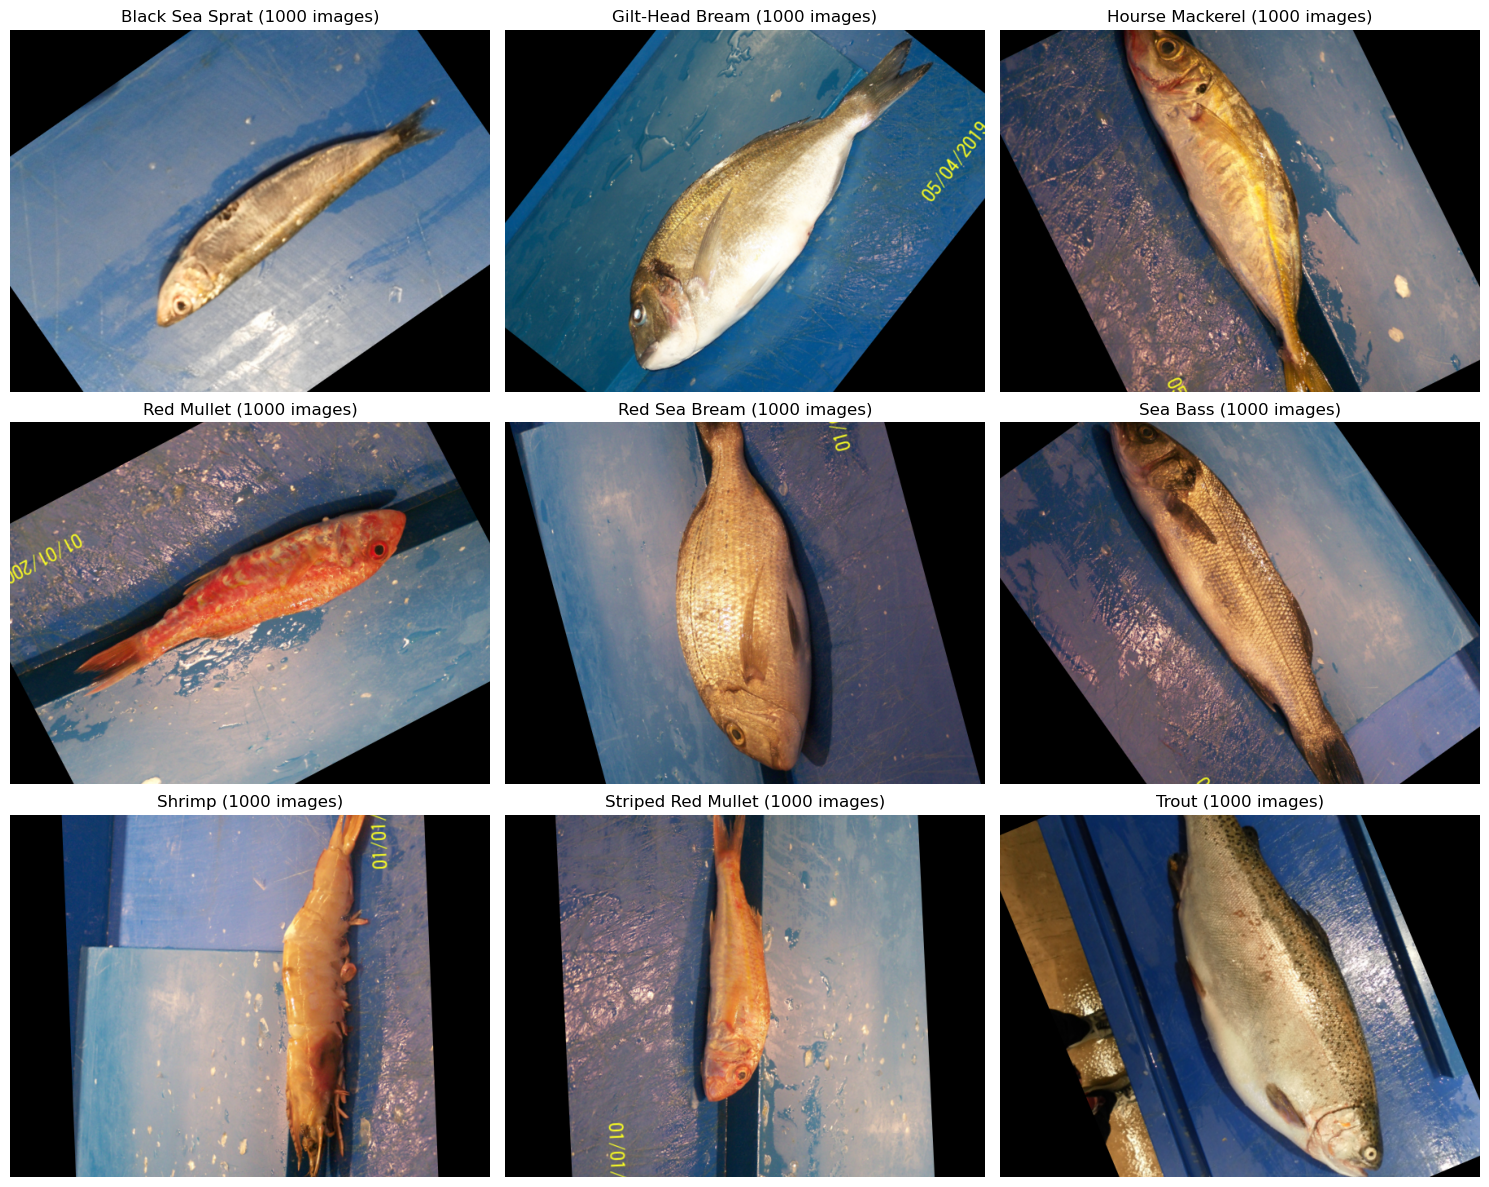

In [6]:
import math

# Number of unique labels in your dataset
unique_labels = data['label'].unique()

# Define the number of columns you want in each row
cols = 3 

# Calculate the number of rows needed to fit all unique labels
rows = math.ceil(len(unique_labels) / cols)

# Set the figure size based on the number of rows
idx = 0
plt.figure(figsize=(15, rows * 4))

# Extract unique labels from the 'label' column and create subplots
for unique_label in unique_labels:
    img_count = len(data[data['label'] == unique_label])
    img_path = data[data['label'] == unique_label].iloc[0, 0]
    
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(plt.imread(img_path))
    plt.title(f"{unique_label} ({img_count} images)")
    plt.axis('off')
    
    idx += 1

# Adjust the layout to make sure all subplots are properly arranged
plt.tight_layout()

# Display the final plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2652\525890533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


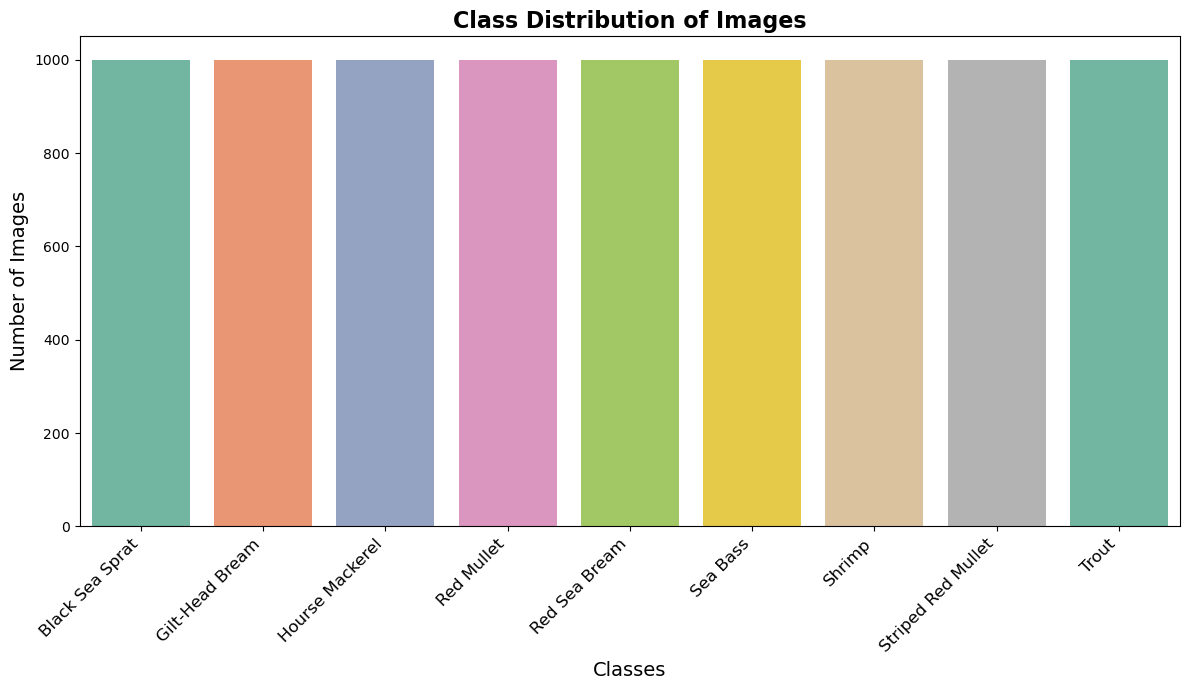

In [7]:
# Set the figure size
plt.figure(figsize=(12, 7))

# Plot the distribution of image counts for each class label using Seaborn
sns.countplot(x='label', data=data, palette='Set2')

# Set the title and labels with more descriptive names
plt.title('Class Distribution of Images', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data,test_size=0.2,shuffle=True,random_state=42)  

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 7200
Testing data size: 1800


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a training data generator with image augmentation techniques
train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

# Create a validation data generator without data augmentation (just normalization)
val_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2 
)

# Create a test data generator with only normalization
test_generator = ImageDataGenerator(rescale=1./255)

# Print a summary of the generators to check their configurations
print("Training generator and validation generator are configured.")

Training generator and validation generator are configured.


In [10]:
# Load training images from the DataFrame using the training data generator
train_images = train_generator.flow_from_dataframe(
    dataframe=train_data,             
    x_col='path',                     
    y_col='label',                    
    target_size=(28, 28),            
    color_mode='rgb',                 
    class_mode='categorical',        
    batch_size=64,                    
    shuffle=True,                     
    seed=42,                          
    subset='training'                 
)

# Load validation images from the DataFrame using the validation data generator
val_images = val_generator.flow_from_dataframe(
    dataframe=train_data,             
    x_col='path',                    
    y_col='label',                    
    target_size=(28, 28),             
    color_mode='rgb',                 
    class_mode='categorical',         
    batch_size=64,                    
    shuffle=True,                    
    seed=42,                          
    subset='validation'               
)

# Load test images from the DataFrame using the test data generator
test_images = test_generator.flow_from_dataframe(
    dataframe=test_data,             
    x_col='path',                    
    y_col='label',                   
    target_size=(28, 28),            
    color_mode='rgb',                 
    class_mode='categorical',        
    batch_size=64,                    
    shuffle=False                    
)

# Optionally, print a summary of the dataset sizes
print(f"Number of training images: {len(train_images)}")
print(f"Number of validation images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.
Number of training images: 90
Number of validation images: 23
Number of test images: 29


In [11]:
import tensorflow as tf
from tensorflow.keras import regularizers

# Initialize a Sequential model
model = tf.keras.models.Sequential()

# Add model layers

# Input Layer
# Flatten the input image (28x28 RGB images) into a 1D array (size 28*28*3)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 3)))

# First Hidden Layer
# Dense layer with 1024 units, ReLU activation, and L2 regularization to prevent overfitting
model.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add batch normalization to normalize activations and speed up training
model.add(tf.keras.layers.BatchNormalization())

# Add dropout to randomly drop 20% of neurons to further prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))

# Second Hidden Layer
# Dense layer with 512 units, ReLU activation, and L2 regularization
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Batch normalization for stabilization
model.add(tf.keras.layers.BatchNormalization())

# Third Hidden Layer
# Dense layer with 256 units, ReLU activation, and L2 regularization
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add another dropout layer to prevent overfitting (20%)
model.add(tf.keras.layers.Dropout(0.2))

# Fourth Hidden Layer
# Dense layer with 128 units, ReLU activation, and L2 regularization
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Fifth Hidden Layer
# Dense layer with 64 units, ReLU activation, and L2 regularization
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add a final dropout layer to further improve generalization
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
# Ensure that this number matches the number of unique classes in your dataset
model.add(tf.keras.layers.Dense(9, activation='softmax'))

# Print the model summary to visualize the architecture
model.summary()

# Ensure the number of unique labels in your dataset
print(f"Number of unique labels: {len(train_data['label'].unique())}")

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,409,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,113,481 (11.88 MB)

 Trainable params: 3,110,409 (11.87 MB)

 Non-trainable params: 3,072 (12.00 KB)

Number of unique labels: 9


In [12]:
# EarlyStopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch >= 20:
        lr *= 0.990 
    return lr
# LearningRateScheduler callback to adjust learning rate during training
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
# Compile the model with the Adagrad optimizer and specified metrics
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01), 
    loss='categorical_crossentropy',
    metrics=['accuracy','precision', 'recall', 'F1Score'],              
)

In [13]:
# Train the model using the training data
results = model.fit(
    train_images, 
    epochs=10, 
    batch_size=64, 
    validation_data=val_images,
    callbacks=[early_stopping,lr_scheduler_callback]
)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 967ms/step - F1Score: 0.2727 - accuracy: 0.2770 - loss: 4.6578 - precision: 0.5307 - recall: 0.0575 - val_F1Score: 0.1976 - val_accuracy: 0.2222 - val_loss: 4.6313 - val_precision: 0.4408 - val_recall: 0.1035 - learning_rate: 0.0100
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 532ms/step - F1Score: 0.6145 - accuracy: 0.6183 - loss: 3.7941 - precision: 0.7853 - recall: 0.4243 - val_F1Score: 0.6397 - val_accuracy: 0.6583 - val_loss: 3.8465 - val_precision: 0.9375 - val_recall: 0.2708 - learning_rate: 0.0100
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 513ms/step - F1Score: 0.7412 - accuracy: 0.7456 - loss: 3.3936 - precision: 0.8410 - recall: 0.6444 - val_F1Score: 0.7330 - val_accuracy: 0.7257 - val_loss: 3.4245 - val_precision: 0.8242 - val_recall: 0.5958 - learning_rate: 0.0100
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 515ms/step - F1Score: 0.8228 - accuracy: 0.8249 - loss: 3.1485 - precision: 0.8862 - recall: 0.7575 - val_F1Score: 0.8114 - val_accur

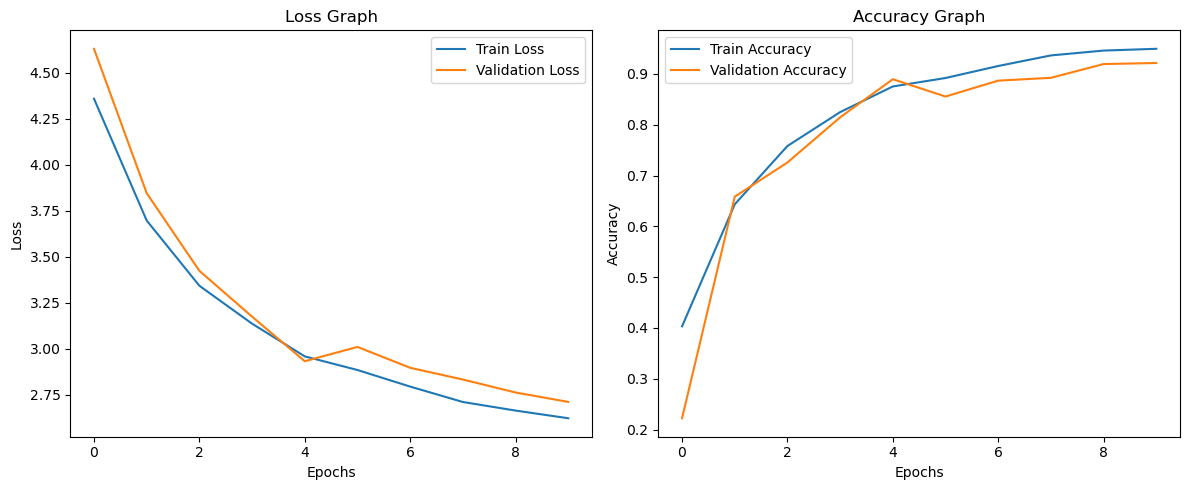

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plots
plt.figure(figsize=(12, 5))

# Plotting the Loss values
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy scores
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
import numpy as np

# Generate predictions for the test dataset
pred = model.predict(test_images)

# Convert the predicted probabilities to class labels
pred_classes = np.argmax(pred, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 695ms/step


In [16]:
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(test_images)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - F1Score: 0.9275 - accuracy: 0.9279 - loss: 2.6790 - precision: 0.9380 - recall: 0.9230


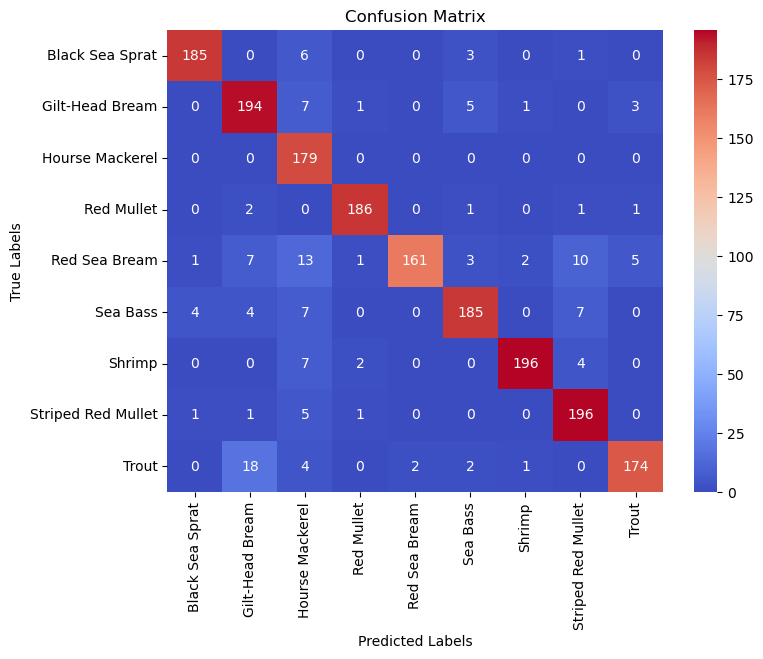

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_classes = test_images.classes
conf_matrix = confusion_matrix(true_classes, pred_classes)

# Get class labels for visualization
class_labels = list(test_images.class_indices.keys())

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels) 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report(true_classes, pred_classes, target_names=class_labels))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.97      0.95      0.96       195
   Gilt-Head Bream       0.86      0.92      0.89       211
   Hourse Mackerel       0.79      1.00      0.88       179
        Red Mullet       0.97      0.97      0.97       191
     Red Sea Bream       0.99      0.79      0.88       203
          Sea Bass       0.93      0.89      0.91       207
            Shrimp       0.98      0.94      0.96       209
Striped Red Mullet       0.89      0.96      0.93       204
             Trout       0.95      0.87      0.91       201

          accuracy                           0.92      1800
         macro avg       0.93      0.92      0.92      1800
      weighted avg       0.93      0.92      0.92      1800

